# GRUPO 5
Gonzalo de Vicente  
Ana Suárez  
Lucas Viñals  
María Longo  
Paula Piniero 

# ENUNCIADO 
Crea un modelo de Red de Neuronas Artificiales que sea capaz de reconocer y clasificar imágenes de ropa en sus diferentes tipologías. Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones. Para ello tendréis que crear un modelo en Keras aplicando de una tirada todos los pasos al conjunto de datos Fashion-MNIST, precargado en Keras y muy parecido al que vimos en clase de reconocimiento de números. Fashion-MNIST es un conjunto de datos de las imágenes de los artículos de Zalando (www.zalando.com), una tienda de moda online alemana especializada en ventas de ropa y zapatos. El conjunto de datos contiene 70K imágenes en escala de grises en 10 categorías. Estas imágenes muestran prendas individuales de ropa en baja resolución (28 x 28 píxeles):

Se usan 60K imágenes para entrenar la red y 10K imágenes para evaluar la precisión con la que la red aprende a clasificar las imágenes


**INTRODUCCIÓN** 
 
Una red neuronal es una forma que tiene la IA de enseñar a los ordenadores a procesar datos que trata de emular al cerebro humano.  
Las unidades de procesamiento de las redes neuronales (neuronas) se organizan en capas. Y existen los siguientes tipos de capas:  
1)La capa de entrada.  
2)La capa intermedia.  
3)La capa de salida.  
El fashion-MNIST es un conjunto de datos consistentes en imágenes con diversas prendas de ropa pertenecientes a artículos de Zalando, que tiene unos 60.000 datos de entrenammiento y 10.000 datos de prueba. Cada una de estas imágenes tiene una dimensión de 28x28 píxeles.  
Las categorías de las imágenes no son números del 0 al 9, sino que en este caso cada número representa una prenda de ropa distinta. 

Veáse la clasificación:

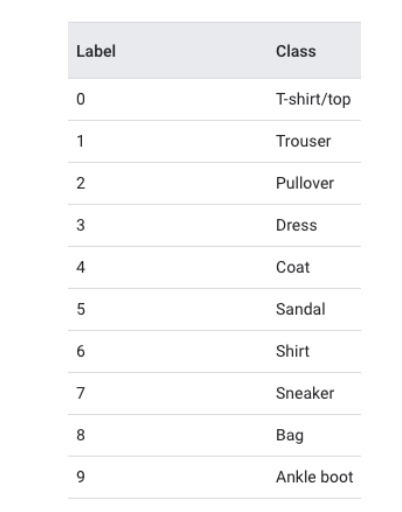





#Cuestiones a tener en cuenta

- Antes de empezar a programar vuestra red neuronal deberéis importar todas las librerías que vais a requerir.

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


- Aseguraos que estáis ejecutando la versión 2.0.0 (o superior) de TensorFlow en vuestro Google Colab


In [2]:
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

2.9.0
GPU Available: []
2.9.2


- Cargar los datos de entrenamiento y de Test a partir de keras.datasets.fashion_mnist

In [3]:
#Cargamos el conjunto de datos fashion_mnist en Keras, que para que nos sea más facil para trabajar lo llamaremos moda
from keras.datasets import fashion_mnist as moda 
(train_images, train_labels), (test_images, test_labels) =moda.load_data()

- Es una buena práctica analizar si los datos tienen la forma esperada

In [4]:
#veamos el tamaño de nuestros datos de entrenamiento.Son 60k como nos decía el enunciado.
len(train_labels) 

60000

In [5]:
#Tenemos 60000 imágenes de entranimiento de tamaño 28x28 cada uno. Ese 28x28 lo vamos a aplanar, normalizandolo.
print(train_images.shape)

(60000, 28, 28)


In [6]:
#veamos el tamaño de nuestros datos de test.Son 10k como nos decía el enunciado.
len(test_labels)

10000

In [7]:
#Tenemos 10k imágenes de entranimiento del mismo tamaño.
print(test_images.shape)

(10000, 28, 28)


In [8]:
#Vemos que el elmento 50000 de nuestros datos de entrenamiento pertenece a la categoría 9 = bota.
train_labels[50000]

9

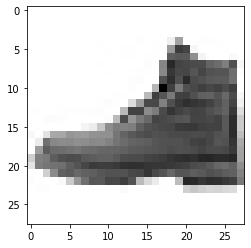

In [9]:
#Efectivamente,vemos que el elemento 50000 es una bota.
import matplotlib.pyplot as plt
digit = train_images[50000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

- Durante una posible fase de pre procesado de datos, analizar el uso de la
función de keras keras.layers.Flatten()

In [10]:
#Primeramente, normalizamos los datos de entrada para que estén en el mimso rango que los pesos de la red. Esto lo haremos diviendolo entre 255
train_images = train_images.astype('float32') / 255
test_images  = test_images.astype('float32') / 255

In [11]:
#Segundo,aplanamos nuestros datos de entrada.
#Esto lo haremos al diseñar nuestra red, con la funcion Flatten, en vez de usar el reshape.

# Para el resto de casos que no se usa la función Flatten, aplanamos los datos mediante reshape.
# train_images=train_images.reshape(60000,28*28)

In [12]:
#Finalmente, vectorizamos los datos de salida con la técnica de one-hot-encoding
train_labels_non_vectorized = train_labels
test_labels_non_vectorized = test_labels
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[50000] 
# Comprobamos que efectivamente la etiqueta 9 se ha vectorizado correctamente.

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

 

 # EJERCICIO 1

1.   Configurar y entrenar los siguientes modelos de red de neuronas, todos con función de pérdida ‘categorical_crossentropy’, métrica de precisión y 5 épocas, analizando y reflexionando sobre los resultados:
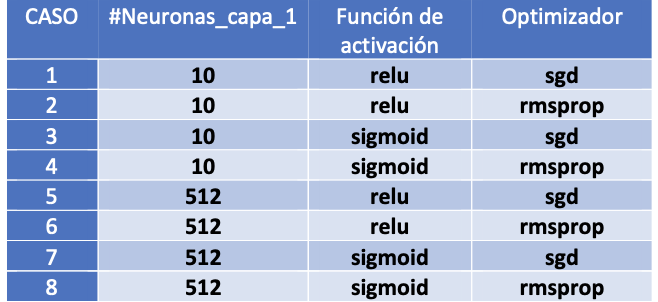


 # PRIMER CASO 

Vamos a entrenar la red neuronal con 10 neuronas en la primera capa,con la función de activación relu, una función de perdida ‘categorical_crossentropy’, y el optimizador sgd:  
Esta es la función relu:   
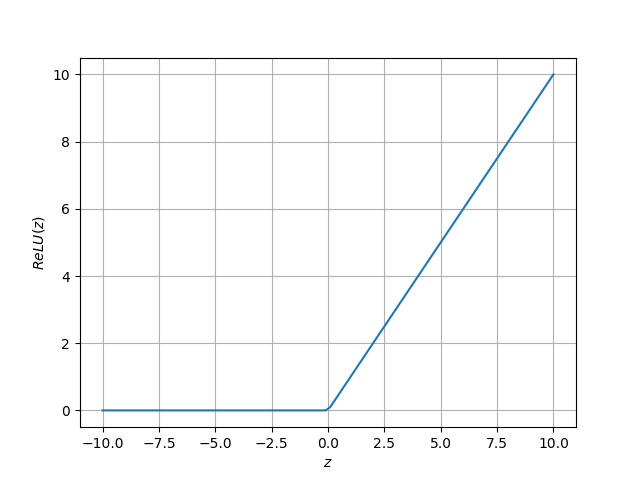  
La función relu tiene las siguientes ventajas:  
1)Puede generar un valor cero verdadero.  
2)La función de activación es lineal para los valores positivos.  
3)

In [13]:
#CONTRUIMOS LA ARQUITECTURA DE LA RED.
from keras import models
from keras import layers
from keras import initializers


#Sequential lo que nos dice es que la capa x se conecta con la x+1
model1 = models.Sequential() 

# Añadimos una capa flatten,en vez de usar el reshape para aplanar nuestros datos de entrada.
model1.add(layers.Flatten(input_shape=(28,28)))
# Para añadir n capas, hay que llamar a la función add n-1 veces. La primera se crea con el input_shape.
model1.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
#nuestra capa de salida:
model1.add(layers.Dense(10, activation='softmax')) 

In [14]:
#CONSTRUIMOS LA RED 
model1.compile(optimizer='sgd', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [15]:
#ENTRENAMOS LA RED

model1.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 1.6202 - accuracy: 0.4376
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.8790 - accuracy: 0.7080
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.7130 - accuracy: 0.7621
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.6391 - accuracy: 0.7874
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5949 - accuracy: 0.8018


Observamos:  
- Después de 5 épocas, ya predice bien casi 8 de 10 imágenes, cuando al principio, eran solo 5 de 10 imágenes. Esto demuestra que el entrenamiento funciona.
- Parece que todavía el aprendizaje no ha convergido, esto es, si le diéramos más epocas, iría aprendiendo más.
- La red ahora mismo es buena, pero todavía tiene mucho margen de mejora.

In [16]:
# EVALUAMOS NUESTRA RED ANTE DATOS NUEVOS:
test_loss, test_acc = model1.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.6039 - accuracy: 0.7937


Observamos:  
- La accuracy en datos de entrenamiento es de 0.7926, lo cual es muy parecido a la accuracy en datos de test, que es de 0.7851.
- Esto significa que no hay overfitting, esto es, no se sobreentrena a la red con datos de entrenamiento.


Ahora veremos que prendas de ropa está clasificando mejor:

In [17]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 1s 3ms/step


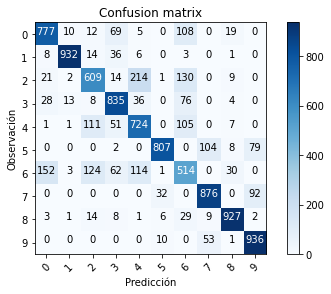

In [18]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Predict the values from the validation dataset
Y_pred = model1.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

Como vemos aquí, las prendas que mejor clasifica son los pantalones (prenda 1),las mochilas (prenda 8) y las botas (prenda 9). Tiene sentido, ya que son accesorios muy diferentes a las demás.
Por contra, la prenda que peor clasifica es la camisa (prenda 6). Las está confundiendo sobre todo, con camisetas (prenda 0), jerseys (prenda 2) y abrigos (prenda 4). De nuevo, tiene sentido, ya que son prendas muy parecidas.  


# SEGUNDO CASO


Vamos a entrenar la red neuronal con 10 neuronas en la primera capa,con la función de activación relu, una función de perdida ‘categorical_crossentropy’, y el optimizador rmsprop:

In [19]:
#CONTRUIMOS LA ARQUITECTURA DE LA RED.

#Sequential lo que nos dice es que la capa x se conecta con la x+1
model2 = models.Sequential() 

# Añadimos una capa flatten,en vez de usar el reshape para aplanar nuestros datos de entrada.
model2.add(layers.Flatten(input_shape=(28,28)))
# Para añadir n capas, hay que llamar a la función add n-1 veces. La primera se crea con el input_shape.
model2.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
#nuestra capa de salida:
model2.add(layers.Dense(10, activation='softmax')) 

In [20]:
#CONSTRUIMOS LA RED 
model2.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [21]:
train_val_images = train_images[:10000]
train_partial_images = train_images[10000:]
train_val_labels = train_labels[:10000]
train_partial_labels = train_labels[10000:]

In [22]:
#ENTRENAMOS LA RED
model2.fit(train_partial_images,
                    train_partial_labels,
                    epochs=5,
                    batch_size=128,
                    validation_data=(train_val_images, train_val_labels))

Epoch 1/5
391/391 [==============================] - 2s 4ms/step - loss: 0.8488 - accuracy: 0.7230 - val_loss: 0.5869 - val_accuracy: 0.8034
Epoch 2/5
391/391 [==============================] - 1s 3ms/step - loss: 0.5327 - accuracy: 0.8182 - val_loss: 0.5089 - val_accuracy: 0.8218
Epoch 3/5
391/391 [==============================] - 1s 3ms/step - loss: 0.4849 - accuracy: 0.8341 - val_loss: 0.4761 - val_accuracy: 0.8355
Epoch 4/5
391/391 [==============================] - 1s 3ms/step - loss: 0.4611 - accuracy: 0.8413 - val_loss: 0.4498 - val_accuracy: 0.8467
Epoch 5/5
391/391 [==============================] - 1s 3ms/step - loss: 0.4462 - accuracy: 0.8439 - val_loss: 0.4489 - val_accuracy: 0.8459


Observamos :
 - Un comportamiento parecido al del primer caso en el sentido de que la red aprende va aprendiendo en mayor medida según avanza en las épocas.
 - La diferencia con el caso 1 esque parece que el optimizador funciona mejor con estos datos ya que llegamos a un accuracy mayor.
 



In [23]:
# EVALUAMOS NUESTRA RED ANTE DATOS NUEVOS:
test_loss, test_acc = model2.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4725 - accuracy: 0.8352


Observamos:
La diferencia entre el accuracy de entremaniento y el del test,sigue siendo mirima, por lo que podemos concluir que apenas hay overfiting


Ahora veremos que prendas de ropa está clasificando mejor:

313/313 [==============================] - 0s 1ms/step


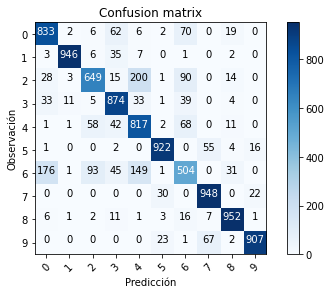

In [24]:


# Predict the values from the validation dataset
Y_pred = model2.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

La matriz de confusión de esta red es muy parecido al de la anterior,por lo que la red está teniendo las mismas dificultades en las mismas prendas.

# TERCER CASO

Vamos a entrenar la red neuronal con 10 neuronas en la primera capa,con la función de activación sigmoid, una función de perdida ‘categorical_crossentropy’, y el optimizador sgd:

In [25]:
#CONTRUIMOS LA ARQUITECTURA DE LA RED.


#Sequential lo que nos dice es que la capa x se conecta con la x+1
model3 = models.Sequential() 
# Añadimos una capa flatten,en vez de usar el reshape para aplanar nuestros datos de entrada.
model3.add(layers.Flatten(input_shape=(28,28)))
# Para añadir n capas, hay que llamar a la función add n-1 veces. La primera se crea con el input_shape.
model3.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
#nuestra capa de salida:
model3.add(layers.Dense(10, activation='softmax')) 

In [26]:
#CONSTRUIMOS LA RED 
model3.compile(optimizer='sgd', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [27]:
#ENTRENAMOS LA RED
model3.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 2.1510 - accuracy: 0.2673
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 1.8833 - accuracy: 0.5448
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 1.6894 - accuracy: 0.6263
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 1.5221 - accuracy: 0.6538
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 1.3815 - accuracy: 0.6701


Observamos:
 - El aprendizaje de esta red, es mucho peor en comparación con las anteriores,tanto desde la etapa inicial hasta la etapa final.
 - Parece que la función de activación sigmoid, no es la apropiada, en cambio la función relu, parece las más eficiente para estos datos.

In [28]:
# EVALUAMOS NUESTRA RED ANTE DATOS NUEVOS:
test_loss, test_acc = model3.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.3291 - accuracy: 0.6627


Observamos:

La accuracy en datos de entrenamiento es de 0.6521, y al evaluar la red con los nuevos datos nos da 0.6639.  
Esto significa que no hay overfitting, de hecho la red mejora la accuracy con los datos de test.

Ahora veremos que prendas de ropa está clasificando mejor:

313/313 [==============================] - 1s 2ms/step


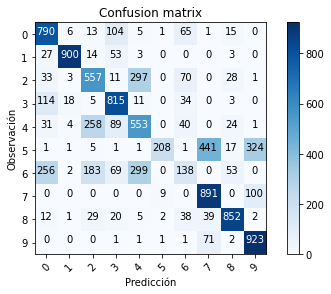

In [29]:

# Predict the values from the validation dataset
Y_pred = model3.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

La matriz de confusión es parecida a las anteriores, pero la prendas que tienen más dificultad, es más pronunciado todavía su mal comportamiento, en concreto la prenda 6.Por eso,las métricas de accuracy anteriores nos dicen que está red es peor.

# CUARTO CASO


Vamos a entrenar la red neuronal con 10 neuronas en la primera capa, con la función de activación sigmoid, una función de perdida ‘categorical_crossentropy’, y el optimizador rmsprop:

In [30]:
#CONTRUIMOS LA ARQUITECTURA DE LA RED.


#Sequential lo que nos dice es que la capa x se conecta con la x+1
model4 = models.Sequential() 
# Añadimos una capa flatten,en vez de usar el reshape para aplanar nuestros datos de entrada.
model4.add(layers.Flatten(input_shape=(28,28)))
# Para añadir n capas, hay que llamar a la función add n-1 veces. La primera se crea con el input_shape.
model4.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
#nuestra capa de salida:
model4.add(layers.Dense(10, activation='softmax')) 

In [31]:
#CONSTRUIMOS LA RED 
model4.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [32]:
#ENTRENAMOS LA RED
model4.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.4578 - accuracy: 0.6262
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.8904 - accuracy: 0.7518
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6720 - accuracy: 0.7810
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5784 - accuracy: 0.8029
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5266 - accuracy: 0.8245


Observamos:

- Alcanzamos una red buena de un rendimiento algo peor que la combinación de la función de activación relu con el optimizador rmsprop(la mejor hasta el momento).
- Destacamos que a pesar de usar la función de activación sigmoid, que en el caso anterior nos ha dado como resultado una red mala, esta vez por cambiar el optimizador por rmsprop, obtenemos un acuraccy bueno.

In [33]:
# EVALUAMOS NUESTRA RED ANTE DATOS NUEVOS:
test_loss, test_acc = model4.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5295 - accuracy: 0.8235


Observamos:
La accuracy en datos de entrenamiento es de 0.8264, y al evaluar la red con los nuevos datos nos da 0.8194.  
Esto significa que no hay overfitting.

Ahora veremos que prendas de ropa está clasificando mejor:

313/313 [==============================] - 0s 1ms/step


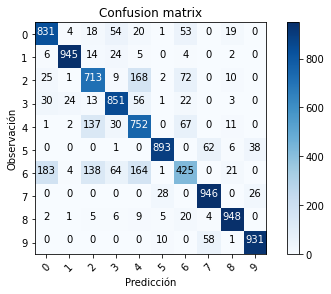

In [34]:


# Predict the values from the validation dataset
Y_pred = model4.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

Muy parecida a las matrices de confusion anteriores.

# QUINTO CASO

Vamos a entrenar la red neuronal con 512 neuronas en la primera capa, con la función de activación relu, una función de perdida ‘categorical_crossentropy’, y el optimizador sgd:

In [35]:
#CONTRUIMOS LA ARQUITECTURA DE LA RED.



#Sequential lo que nos dice es que la capa x se conecta con la x+1
model5 = models.Sequential() 
# Añadimos una capa flatten,en vez de usar el reshape para aplanar nuestros datos de entrada.
model5.add(layers.Flatten(input_shape=(28,28)))

# Para añadir n capas, hay que llamar a la función add n-1 veces. La primera se crea con el input_shape.
model5.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
#nuestra capa de salida:
model5.add(layers.Dense(10, activation='softmax')) 

In [36]:
#CONSTRUIMOS LA RED 
model5.compile(optimizer='sgd', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [37]:
#ENTRENAMOS LA RED
model5.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 1.0250 - accuracy: 0.6919
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.6565 - accuracy: 0.7910
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5794 - accuracy: 0.8127
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5393 - accuracy: 0.8231
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5127 - accuracy: 0.8305


Observamos:
- La mejor comparación de esta red, sería el caso 1,ya que tienen la misma función de activación y el mismo optimizador.Efectivamente al añadidr más neuronas a la capa intermedia,permitimos tener un modelo mas complejo con más parámetros, que finalmente se traduce en  una red capaz de aprender más conocimiento y llegar a un accuracy más alto.
- Interesante que no ha superado la mejor red hasta el momento con 10 neuronas, osea el segundo caso.

In [38]:
# EVALUAMOS NUESTRA RED ANTE DATOS NUEVOS:
test_loss, test_acc = model5.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.5246 - accuracy: 0.8228


Observamos:
La accuracy en datos de entrenamiento es de 0.8285, y al evaluar la red con los nuevos datos nos da 0.8338.  
Esto significa que no hay overfitting, de hecho la red mejora la accuracy con los datos de test.

Ahora veremos que prendas de ropa está clasificando mejor:

313/313 [==============================] - 1s 3ms/step


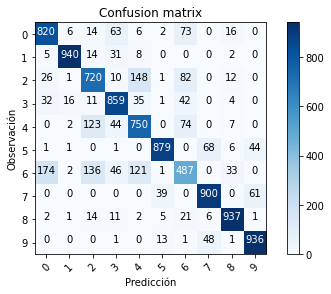

In [39]:
# Predict the values from the validation dataset
Y_pred = model5.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

Vemos una matriz similar a las vistas anteriormente, con la peculiaridad de que la prenda 0 tiene un rendimiento mejor.
Empezamos a tener redes capaces de distinguir las prendas más difíciles y parecidas entre ellas, las prendas de la parte de arriba.

# SEXTO CASO

Vamos a entrenar la red neuronal con 512 neuronas en la primera capa, con la función de activación relu, una función de perdida ‘categorical_crossentropy’, y el optimizador rmsprop:

In [40]:
#CONTRUIMOS LA ARQUITECTURA DE LA RED.

#Sequential lo que nos dice es que la capa x se conecta con la x+1
model6 = models.Sequential() 
# Añadimos una capa flatten,en vez de usar el reshape para aplanar nuestros datos de entrada.
model6.add(layers.Flatten(input_shape=(28,28)))
# Para añadir n capas, hay que llamar a la función add n-1 veces. La primera se crea con el input_shape.
model6.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
#nuestra capa de salida:
model6.add(layers.Dense(10, activation='softmax')) 

In [41]:
#CONSTRUIMOS LA RED 
model6.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [42]:
#ENTRENAMOS LA RED
model6.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.5605 - accuracy: 0.8031
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.3811 - accuracy: 0.8600
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.3352 - accuracy: 0.8764
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.3097 - accuracy: 0.8859
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.2920 - accuracy: 0.8934


Observamos:
- Tenemos la mejor red hasta el momento ya que hemos unido las mejores caractéristicas encontradas hasta el momento:
          - Función de activación relu
          - Optimizador rmsprop
          - Una capa de mayor tamaño,512 neuronas.

In [43]:
# EVALUAMOS NUESTRA RED ANTE DATOS NUEVOS:
test_loss, test_acc = model6.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3536 - accuracy: 0.8694


Observamos:
La accuracy en datos de entrenamiento es de 0.8913, y al evaluar la red con los nuevos datos nos da 0.8656.  
Esto significa que hay un poco overfitting,pero nada preocupante por el momento.

Ahora veremos que prendas de ropa está clasificando mejor:

313/313 [==============================] - 1s 3ms/step


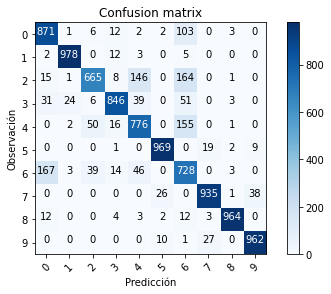

In [44]:
# Predict the values from the validation dataset
Y_pred = model6.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

Seguimos teniendo dificultades en las mismas prendas, pero con menor grado.

# SÉPTIMO CASO

Vamos a entrenar la red neuronal con 512 neuronas en la primera capa, con la función de activación sigmoid, una función de perdida ‘categorical_crossentropy’, y el optimizador sgd:

In [45]:
#CONTRUIMOS LA ARQUITECTURA DE LA RED.

#Sequential lo que nos dice es que la capa x se conecta con la x+1
model7 = models.Sequential() 
# Añadimos una capa flatten,en vez de usar el reshape para aplanar nuestros datos de entrada.
model7.add(layers.Flatten(input_shape=(28,28)))

# Para añadir n capas, hay que llamar a la función add n-1 veces. La primera se crea con el input_shape.
model7.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
#nuestra capa de salida:
model7.add(layers.Dense(10, activation='softmax')) 

In [46]:
#CONSTRUIMOS LA RED 
model7.compile(optimizer='sgd', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [47]:
#ENTRENAMOS LA RED
model7.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 1.7105 - accuracy: 0.5899
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 1.1276 - accuracy: 0.7160
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.9213 - accuracy: 0.7334
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.8193 - accuracy: 0.7447
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.7584 - accuracy: 0.7542


Observamos:
- Queda lejos de la mejor red, pero mejora significativamente la red del caso 3 que tiene la misma función de activación y el mismo optimizador.Es decir,aumentar el número de neuronas parece algo positivo de forma consistente. 


In [48]:
# EVALUAMOS NUESTRA RED ANTE DATOS NUEVOS:
test_loss, test_acc = model7.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.7482 - accuracy: 0.7502


Observamos:

La accuracy en datos de entrenamiento es de 0.8285, y al evaluar la red con los nuevos datos nos da 0.8158.  
Esto significa que no hay overfitting.

Ahora veremos que prendas de ropa está clasificando mejor:

313/313 [==============================] - 1s 3ms/step


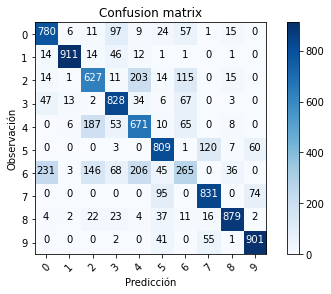

In [49]:
# Predict the values from the validation dataset
Y_pred = model7.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

La matriz de confusión, otra vez, es muy parecida a las matrices de confusión de los casos anteriores, en concreto con el caso 3, con mayor dificultad en la prenda 6.

 # OCTAVO CASO 
 

Vamos a entrenar la red neuronal con 512 neuronas en la primera capa, con la función de activación sigmoid, una función de perdida ‘categorical_crossentropy’, y el optimizador rmsprop:

In [50]:
#CONTRUIMOS LA ARQUITECTURA DE LA RED.

#Sequential lo que nos dice es que la capa x se conecta con la x+1
model8 = models.Sequential() 
# Añadimos una capa flatten,en vez de usar el reshape para aplanar nuestros datos de entrada.
model8.add(layers.Flatten(input_shape=(28,28)))

# Para añadir n capas, hay que llamar a la función add n-1 veces. La primera se crea con el input_shape.
model8.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
#nuestra capa de salida:
model8.add(layers.Dense(10, activation='softmax')) 

In [51]:
#CONSTRUIMOS LA RED 
model8.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [52]:
#ENTRENAMOS LA RED
model8.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 13ms/step - loss: 0.5910 - accuracy: 0.7923
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.4269 - accuracy: 0.8454
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.3855 - accuracy: 0.8601
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3591 - accuracy: 0.8697
Epoch 5/5
469/469 [==============================] - 7s 14ms/step - loss: 0.3397 - accuracy: 0.8760


Observamos:
 - Tenemos una red muy buena, algo peor que la mejor encontrada,porque la funcion relu ha funcionado mejor que sigmoide de manera consistente.

In [53]:
# EVALUAMOS NUESTRA RED ANTE DATOS NUEVOS:
test_loss, test_acc = model8.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.3666 - accuracy: 0.8687


Observamos:

La accuracy en datos de entrenamiento es de 0.8755, y al evaluar la red con los nuevos datos nos da 0.8633.  
Esto significa que no  hay overfitting.

Ahora veremos que prendas de ropa está clasificando mejor:

313/313 [==============================] - 1s 4ms/step


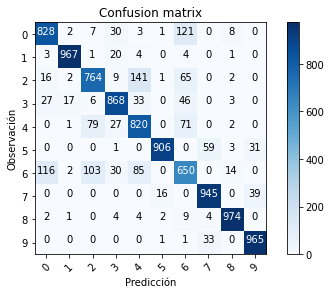

In [54]:
# Predict the values from the validation dataset
Y_pred = model8.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_labels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

 La matriz de confusión no nos destaca nada nuevo.

# EJERCICIO 2: 
Explicar la salida de la llamada model.summary() de cada uno de los 8 casos

In [55]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [56]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [57]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [58]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Observamos:
- Que la arquitectura de los cuatro casos es la misma.
- Vemos dos capas en esta arquitectura (aparte de la entrada), ambas con 10  neuronas y número de parámetros lo explicamos en la siguiente operación.


In [59]:
(0 # Flatten
+28*28*10 # Pesos capa intermedia
+10 # Sesgos capa intermedia
+10*10 # Pesos capa salida
+10 # Sesgos capa salida
)

7960

In [60]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [61]:
model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [62]:
model7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [63]:
model8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Observamos:
- Que la arquitectura de los cuatro casos es la misma.
- Vemos dos capas en esta arquitectura (aparte de la entrada), la primera de 512 neuronas y la segunda de 10 y número de parámetros lo explicamos en la siguiente operación.


In [64]:
(0 # Flatten
+28*28*512 # Pesos capa intermedia
+512 # Sesgos capa intermedia
+512*10 # Pesos capa salida
+10 # Sesgos capa salida
)

407050

# EJERCICIO 3:  
- Analizar e interpretar los resultados del caso 2 y el 7 frente a sus originales si se multiplica por 5 las épocas de entrenamiento (25).

In [65]:
#ENTRENAMOS LA RED
model2.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 2s 4ms/step - loss: 0.4364 - accuracy: 0.8485
Epoch 2/25
469/469 [==============================] - 2s 5ms/step - loss: 0.4271 - accuracy: 0.8513
Epoch 3/25
469/469 [==============================] - 2s 4ms/step - loss: 0.4196 - accuracy: 0.8533
Epoch 4/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4129 - accuracy: 0.8566
Epoch 5/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4072 - accuracy: 0.8573
Epoch 6/25
469/469 [==============================] - 2s 4ms/step - loss: 0.4034 - accuracy: 0.8589
Epoch 7/25
469/469 [==============================] - 1s 3ms/step - loss: 0.3992 - accuracy: 0.8601
Epoch 8/25
469/469 [==============================] - 1s 3ms/step - loss: 0.3954 - accuracy: 0.8599
Epoch 9/25
469/469 [==============================] - 2s 4ms/step - loss: 0.3927 - accuracy: 0.8614
Epoch 10/25
469/469 [==============================] - 2s 3ms/step - loss: 0.3892 - accuracy: 0.8631

In [66]:
# EVALUAMOS NUESTRA RED ANTE DATOS NUEVOS:
test_loss, test_acc = model2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4505 - accuracy: 0.8421


En el segundo caso, hemos mejorado muy ligeramente (0.842 con 5 épocas frente a 0.8498 con 25 épocas).   
Concluimos que con pocas épocas, alcanzamos la plenitud del conocimiento que alcanza la red.

In [67]:
#ENTRENAMOS LA RED
model7.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 6s 13ms/step - loss: 0.7169 - accuracy: 0.7611
Epoch 2/25
469/469 [==============================] - 5s 10ms/step - loss: 0.6863 - accuracy: 0.7681
Epoch 3/25
469/469 [==============================] - 4s 8ms/step - loss: 0.6621 - accuracy: 0.7747
Epoch 4/25
469/469 [==============================] - 4s 8ms/step - loss: 0.6424 - accuracy: 0.7793
Epoch 5/25
469/469 [==============================] - 4s 8ms/step - loss: 0.6257 - accuracy: 0.7851
Epoch 6/25
469/469 [==============================] - 4s 8ms/step - loss: 0.6112 - accuracy: 0.7889
Epoch 7/25
469/469 [==============================] - 4s 8ms/step - loss: 0.5984 - accuracy: 0.7927
Epoch 8/25
469/469 [==============================] - 4s 8ms/step - loss: 0.5873 - accuracy: 0.7964
Epoch 9/25
469/469 [==============================] - 4s 8ms/step - loss: 0.5774 - accuracy: 0.7997
Epoch 10/25
469/469 [==============================] - 4s 8ms/step - loss: 0.5683 - accuracy: 0.80

In [68]:
# EVALUAMOS NUESTRA RED ANTE DATOS NUEVOS:
test_loss, test_acc = model7.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.5188 - accuracy: 0.8164


En el séptimo caso, hemos mejorado bastante (0.75 con 5 épocas frente a 0.81 con 25 épocas).   
En este caso, más epocas nos han ayudado, creemos, porque es un modelo más complejo de más neuronas.  
En cambio en el modelo 2, al ser un modelo más simple, con menos épocas convergemos más rápido.

# EJERCICIO 4:
Evaluar cada uno de los 8 modelos comparando el rendimiento del modelo en
el conjunto de datos de prueba

Ya hemos ido respondiendo a esta pregunta en cada uno de los modelos a lo largo del ejercicio 1.  A continuación ponemos las conclusiones más relevantes:  
- En todos los casos 1 contra 1, ha ganado la función relu frente a la sigmoid, el optimizador rmsprop frente al optimizador sgd, y una capa de 512 neuronas a una de 10.
- Efectivamente, la combinación de las mejores características (relu + rmsprop + 512 neuronas) ha sido el mejor modelo.


# EJERCICIO 5:  
Usar cada uno de los 8 modelos para hacer predicciones sobre la 6ª imagen de
test (test_images[5])

In [69]:
Y_pred = model1.predict(test_images)
Y_pred[5]

313/313 [==============================] - 1s 2ms/step


array([1.35848597e-02, 9.51855958e-01, 6.18865481e-03, 6.87670242e-03,
       2.12814566e-02, 1.15872335e-05, 1.90948922e-04, 3.39361144e-08,
       2.25142844e-06, 7.46915430e-06], dtype=float32)

In [70]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')

313/313 [==============================] - 1s 2ms/step


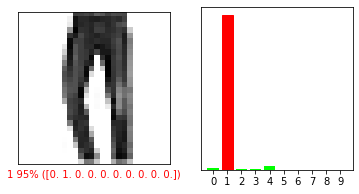

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

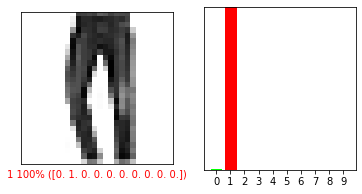

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

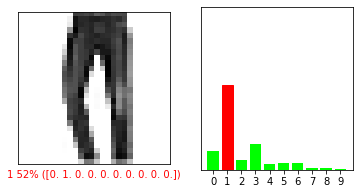

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

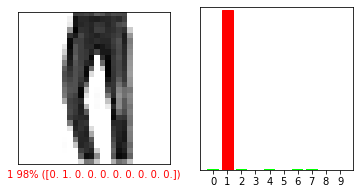

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

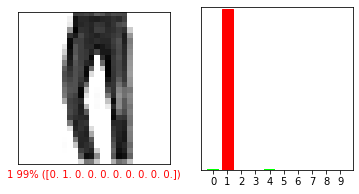

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

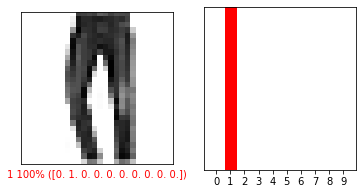

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

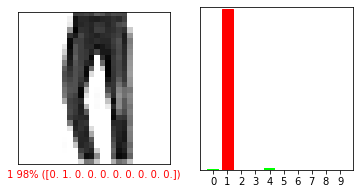

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

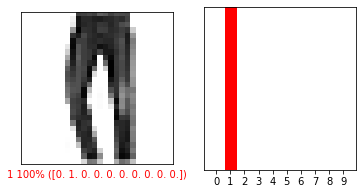

<Figure size 432x288 with 0 Axes>

In [71]:
import numpy as np
import matplotlib.pyplot as plt

for model in [model1, model2, model3, model4, model5, model6, model7, model8]:
  predictions = model.predict(test_images)
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(5, predictions[5], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(5, predictions[5],  test_labels)
  plt.show()
  plt.clf()

Todos los modelos predicen bien la imagen 6 como unos pantalones, pero el modelo 3 tiene más dudas a la hora de saber que es un pantalón. Con la prenda que más confunde es con un vestido.  
Esto tiene sentido porque el peor modelo, como hemos dicho antes, es el modelo 3.

# EJERCICIO 6:
Utilice el siguiente código para graficar cómo de bien o de mal se comporta el
modelo para cada uno de los 8 casos  
Ejemplo de uso para ver la predicción de la 6ª figura de las imágenes de test.  
Utilícelo para ver la predicción, igual que el gráfico anterior, de las 10 primeras
imágenes del conjunto de test, para cada uno de los 8 casos.  
Reflexione y
comente las diferencias que observa.

313/313 [==============================] - 0s 1ms/step


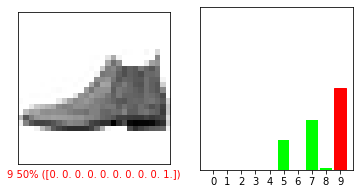

313/313 [==============================] - 0s 1ms/step


<Figure size 432x288 with 0 Axes>

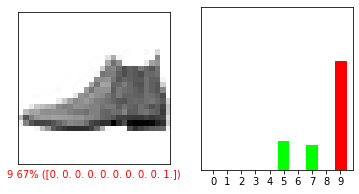

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

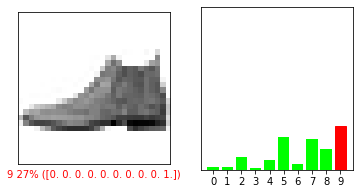

313/313 [==============================] - 0s 2ms/step


<Figure size 432x288 with 0 Axes>

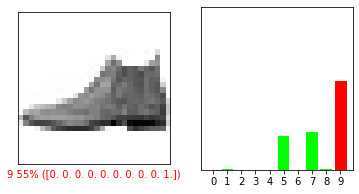

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

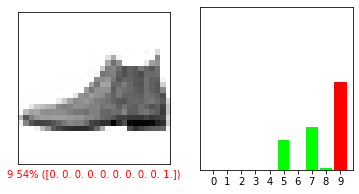

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

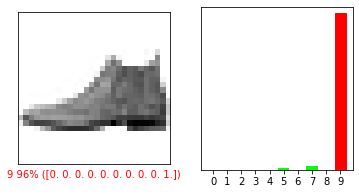

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

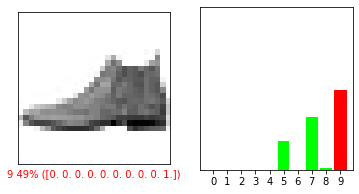

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

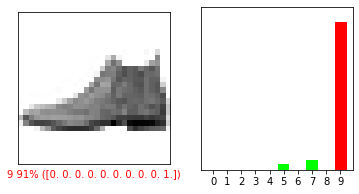

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

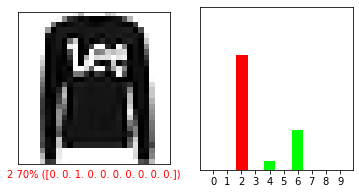

313/313 [==============================] - 0s 1ms/step


<Figure size 432x288 with 0 Axes>

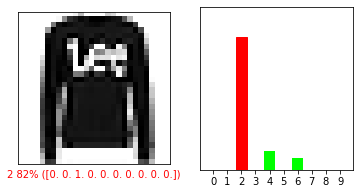

313/313 [==============================] - 0s 1ms/step


<Figure size 432x288 with 0 Axes>

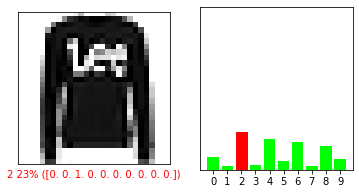

313/313 [==============================] - 0s 1ms/step


<Figure size 432x288 with 0 Axes>

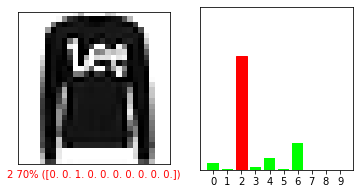

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

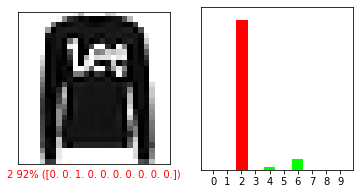

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

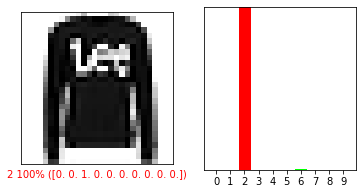

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

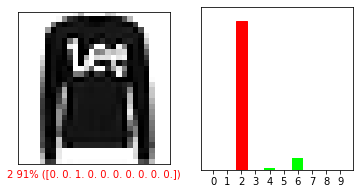

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

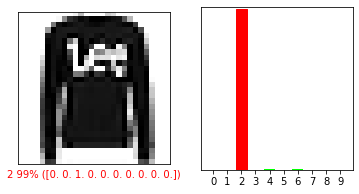

313/313 [==============================] - 0s 1ms/step


<Figure size 432x288 with 0 Axes>

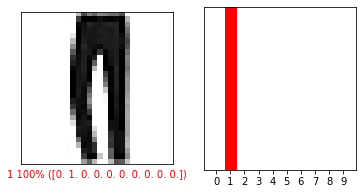

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

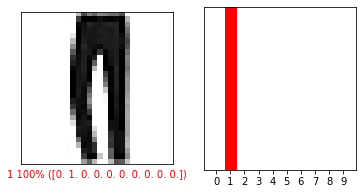

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

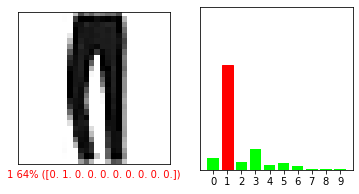

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

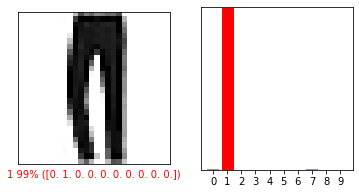

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

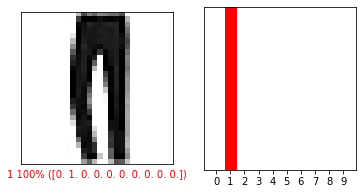

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

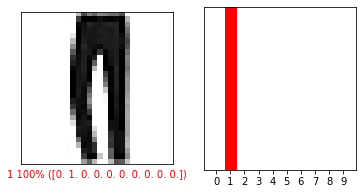

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

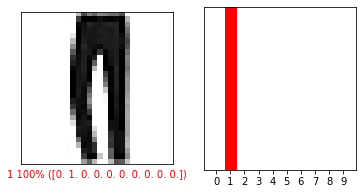

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

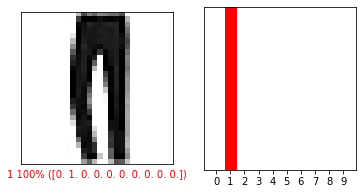

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

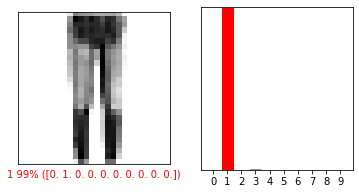

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

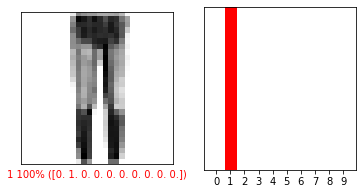

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

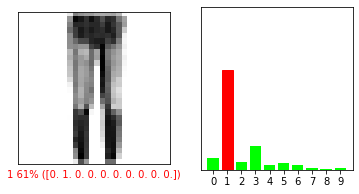

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

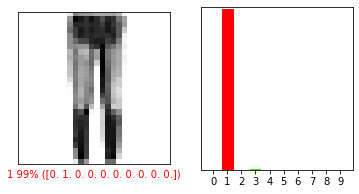

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

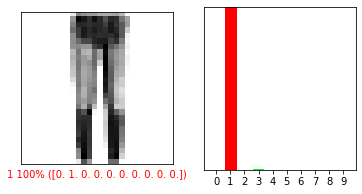

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

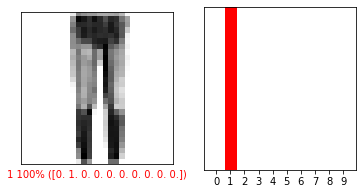

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

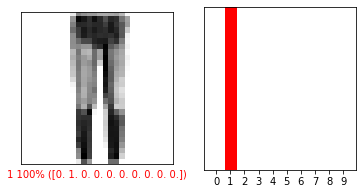

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

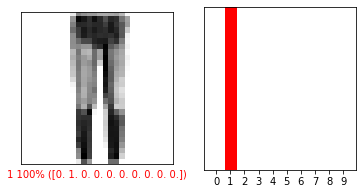

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

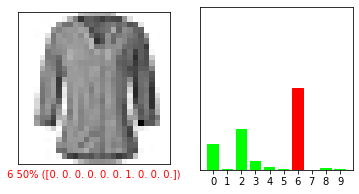

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

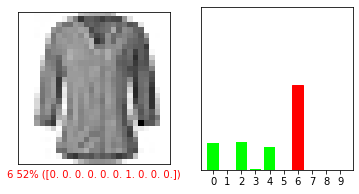

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

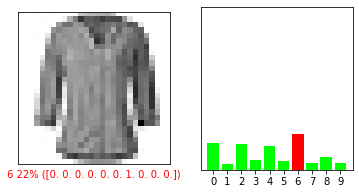

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

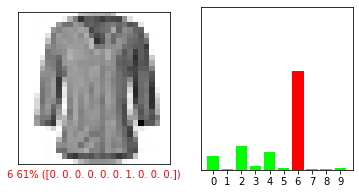

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

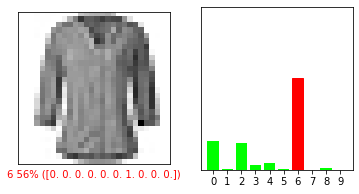

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

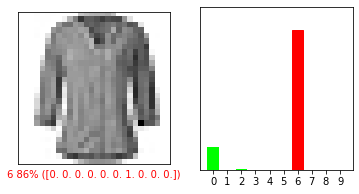

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

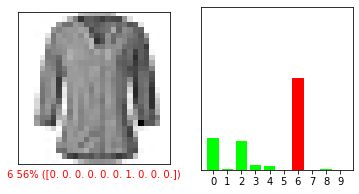

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

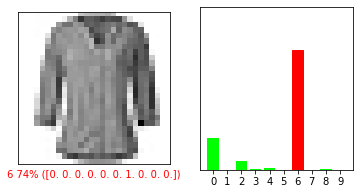

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

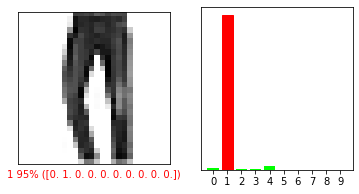

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

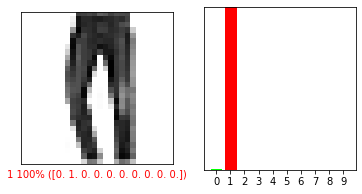

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

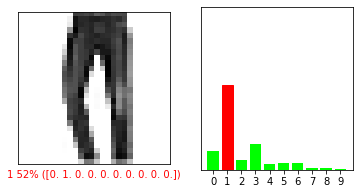

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

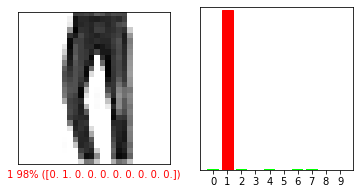

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

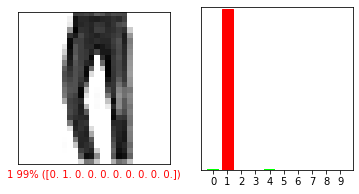

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

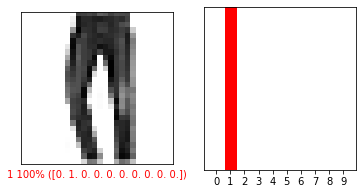

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

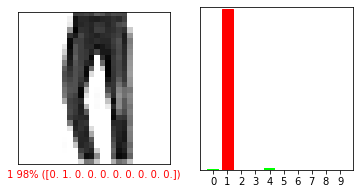

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

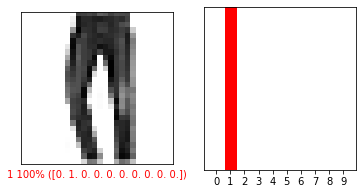

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

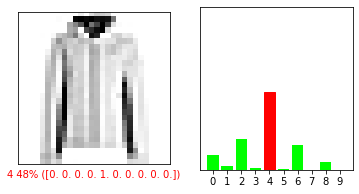

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

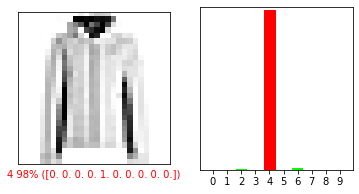

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

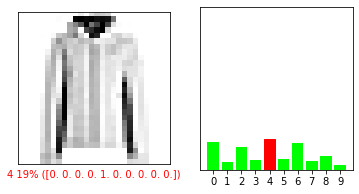

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

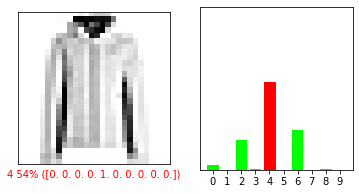

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

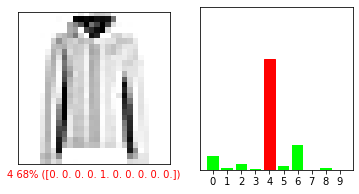

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

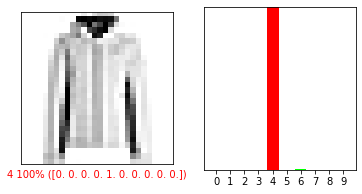

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

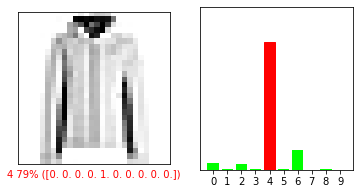

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

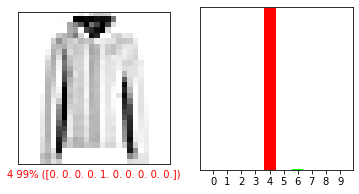

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

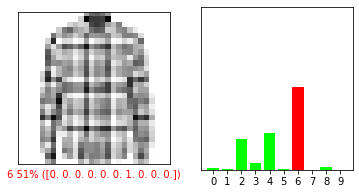

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

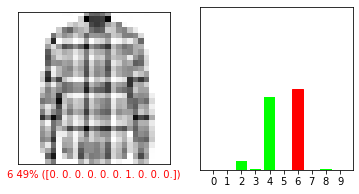

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

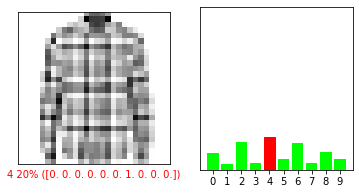

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

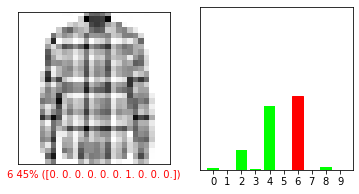

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

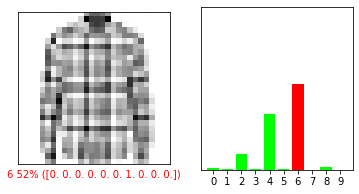

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

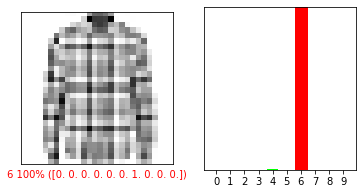

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

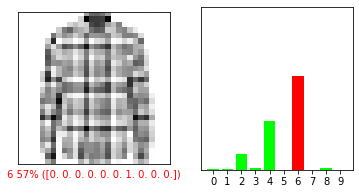

313/313 [==============================] - 1s 4ms/step


<Figure size 432x288 with 0 Axes>

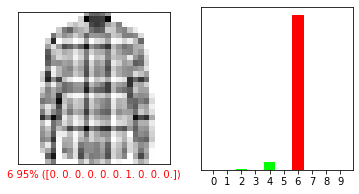

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

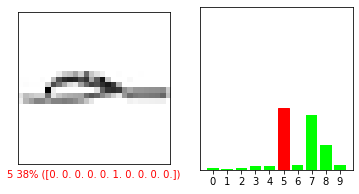

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

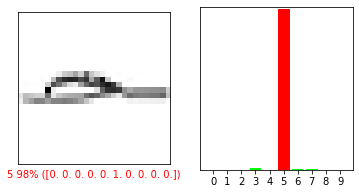

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

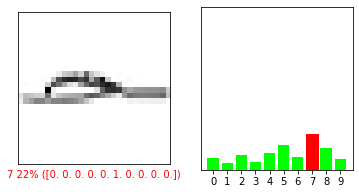

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

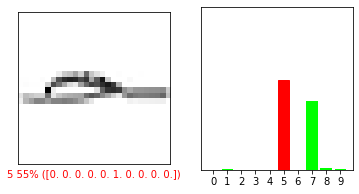

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

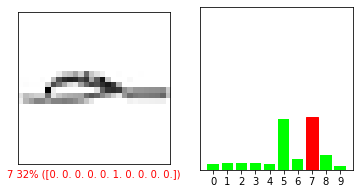

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

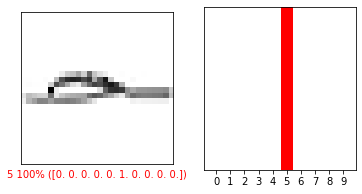

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

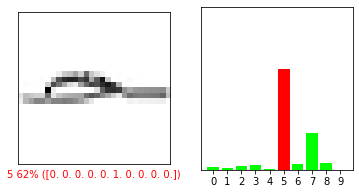

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

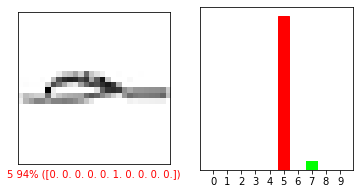

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

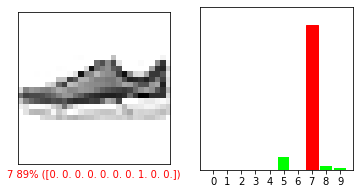

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

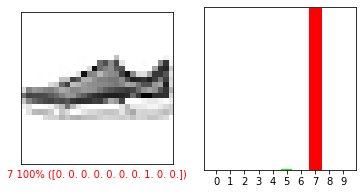

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

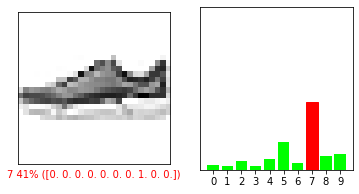

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

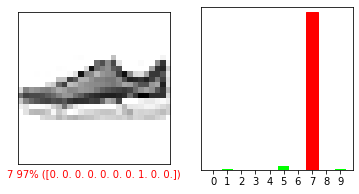

313/313 [==============================] - 1s 4ms/step


<Figure size 432x288 with 0 Axes>

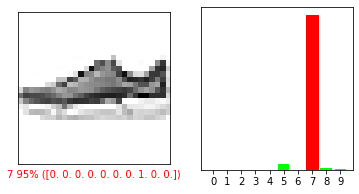

313/313 [==============================] - 1s 3ms/step


<Figure size 432x288 with 0 Axes>

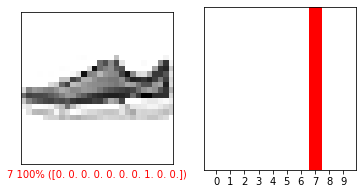

313/313 [==============================] - 1s 4ms/step


<Figure size 432x288 with 0 Axes>

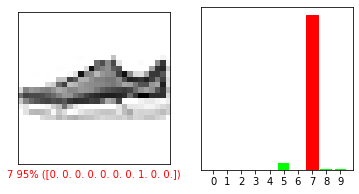

313/313 [==============================] - 1s 4ms/step


<Figure size 432x288 with 0 Axes>

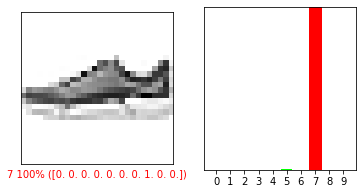

<Figure size 432x288 with 0 Axes>

In [72]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(10):
  for model in [model1, model2, model3, model4, model5, model6, model7, model8]:
    predictions = model.predict(test_images)
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()
    plt.clf()

Como vemos aquí, el modelo 3 es el peor para todas las prendas de ropa, ya que es el que más dudas tiene, como hemos podido ver en la matriz de confusión en el ejercicio 1.

# EJERCICIO 7:
Mejore el modelo usando el de la configuración del caso 3, pero cambiando el
optimizador por ‘adam’ y la función de pérdida
‘sparse_categorical_crossentropy’.   
Buscar en internet las bases de dicho
optimizador y función de pérdida, explícalos con tus propias palabras y plantea
tus reflexiones respecto al resultado.

In [73]:
#CONSTRUIMOS LA RED 
model3.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [74]:
#ENTRENAMOS LA RED


model3.fit(train_images, train_labels_non_vectorized, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.9917 - accuracy: 0.7385
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.6996 - accuracy: 0.8015
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5813 - accuracy: 0.8229
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5231 - accuracy: 0.8333
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4882 - accuracy: 0.8396


In [75]:
#CONSTRUIMOS LA RED 
model6.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [76]:
#ENTRENAMOS LA RED


model6.fit(train_images, train_labels_non_vectorized, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2684 - accuracy: 0.9018
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2519 - accuracy: 0.9078
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2376 - accuracy: 0.9118
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2282 - accuracy: 0.9148
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2189 - accuracy: 0.9177


Para usar una función de pérdida sparse_categorical_crossentropy, hemos tenido que utilizar las etiquetas NO vectorizadas.  
Con el optimizador Adam, las redes aprenden mucho mejor, en concreto, tras la red 6 que era la mejor hasta el momento, hemos conseguido que predizca en la primera época 9 de 10 imágenes, esto es, hemos mejorado su rendimiento.

**¿CÓMO HEMOS AFRONTADO LA PRÁCTICA?**

Para empezar a realizar nuestra práctica, primeramente , tras leer el enunciado de la práctica,analizamos los distintos Jupyter Notebooks vistos en clase,Gonzalo y Ana,realizaron las cuestiones a tener en cuenta para realizar la red neuronal,aquí se encontró  la dificultad de la función Flatten, ya que no sabíamos muy bien como se ejecutaba.
Después de realizar este primer paso,Gonzalo y Ana,empezaron con los 8 casos, sacando las conclusiones en cada una de ellas, fue una parte fácil y entretenida para nosotros . 
Tras realizar los 8 casos, entre todos, llegamos a la conclusión de que el mejor de los casos era el sexto caso, ya que era cuando la red aprendía mejor.

En el ejercicio 2, para explicar el model.summary entre todos, llegamos a la conclusión de que la arquitectura de la red para los 4 primeros casos es la misma, se realizó lo mismo para los casos del 5 al 8.  
También comprobamos como estaban compuestos los parámetros de las neuronas. 
En los ejercicios 3, 4 y 5 no nos encontramos con ningún tipo de dificultad y se sacaron las conclusiones mencionadas en el ejercicio.  
En el ejercicio 6, previamente utilizamos la plantilla vista en clase y vimos que no se producía ningún cambio con la plantilla que se nos daba en el enunciado.  
En el ejercicio 7, Ana y Gonzalo, encontraron dificultades, ya que no sabían porque nos daba error todo el rato hasta que buscando información se dieron cuenta de que los datos no podían estar vectorizados al usar la función de pérdida sparse_categorical_crossentropy. Esta ha sido sin ninguna duda la parte más complicada.

 





**CONCLUSIÓN**

Tras realizar las 8 redes, concluimos que la mejor red neuronal es la del caso 6, con 512 neuronas en la primera capa, con la función de activación relu, una función de perdida ‘categorical_crossentropy’, y el optimizador rmsprop.  

También tras realizar las distintas matrices de confusión y las distintas predicciones de las imágenes, vemos que la prenda más difícil de identificar por la red neuronal, es la prenda 6,  la camisa. La  confunde sobre todo, con camisetas (prenda 0), jerseys (prenda 2) y abrigos (prenda 4).
Esto tiene todo el sentido del mundo, ya que el ser humano a veces también puede llegar a confundirlo, y como ya hemos dicho previamente una red neuronal trata de imitar trata de imitar el cerebro humano.

Al mejorar el modelo usando el optimizador por ‘adam’ y la función de pérdida ‘sparse_categorical_crossentropy’, nos hemos encontrado con la  dificultad en la función perdida de que no se debe normalizar los datos de entrada.
Tras realizar todos nuestros, hemos concluido que la mejor red es esta última, ya que tiene el accuracy más alto.



**BIBLIOGRAFÍA**:

  - https://datascience.eu/es/aprendizaje-automatico/funcion-de-activacion-relu/
  - https://www.codificandobits.com/blog/funcion-de-activacion/ (de aquí hemos sacado la imagen)
  - https://www.diegocalvo.es/funcion-de-coste-redes-neuronales/#:~:text=Adam,el%20ratio%20de%20aprendizaje%20aumentar%C3%A1.